In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv("bigdatamarttest.csv")

In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [79]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [80]:
df.shape

(5681, 11)

In [81]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [82]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1  

In [83]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [84]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight and Outlet_Size both have Nan Values

Item_Weight and Outlet_Size has String values,so we eill change into numeric values.

In [85]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [86]:
df['Item_Weight'].isnull().sum()

0

In [87]:
df['Outlet_Size'].isnull().sum()

0

Nan values are removed from both columns.

In [88]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,10.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Item_Fat_Content,Item_Type,,Outlet_Identifier,Outlet_Size,Outlet_Location_Type and Outlet_Type has a String values,so we need to change into numeric values.
we will apply LabelEncoder to convert String into numeric data so that we can apply the model.

In [89]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [90]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,NCN55,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,FDQ58,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,FDY38,10.500,2,0.118599,4,234.2300,5,1985,1,2,3


Now all string values changed into numeric values.

we will drop the Item_Identifier field,we dont need it to apply the model.

In [91]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [92]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,10.500,2,0.118599,4,234.2300,5,1985,1,2,3


now we are checking again,all columns are numeric.

we will check correlation between columns.

In [93]:
df_cor=df.corr()
df_cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.043520,-0.037716,0.030524,0.042194,0.022274,0.146956,-0.013106,-0.028944,-0.073474
Item_Fat_Content,-0.043520,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,0.000421,-0.000130,0.000387
Item_Visibility,-0.037716,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,0.058082,-0.001146,-0.154042
Item_Type,0.030524,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.003729,0.000584,0.006179
Item_MRP,0.042194,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,-0.011717,0.001754,0.003326
Outlet_Identifier,0.022274,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.504545,-0.716113,0.099937
Outlet_Establishment_Year,0.146956,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.193397,-0.089496,-0.122841
Outlet_Size,-0.013106,0.000421,0.058082,-0.003729,-0.011717,0.504545,0.193397,1.000000,-0.614284,-0.201538
Outlet_Location_Type,-0.028944,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.614284,1.000000,0.467299
Outlet_Type,-0.073474,0.000387,-0.154042,0.006179,0.003326,0.099937,-0.122841,-0.201538,0.467299,1.000000


In [94]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.318422,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,4.325238,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,10.500000,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


skewness is present in Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Size,outlet_Location_Type and Outlet_Type columns.
outliers are present in Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year and Outlet_Type.

<AxesSubplot:>

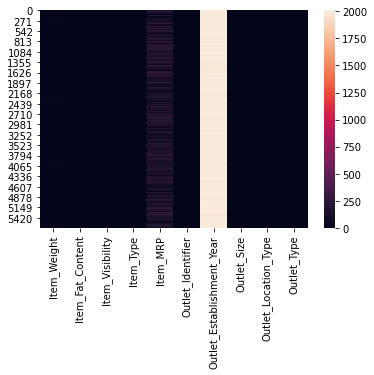

In [95]:
sns.heatmap(df)

There is no null values.

<AxesSubplot:>

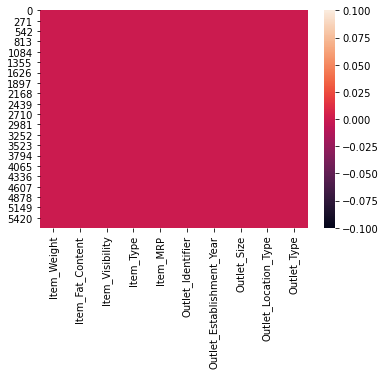

In [96]:
sns.heatmap(df.isnull())

No null values.

<AxesSubplot:>

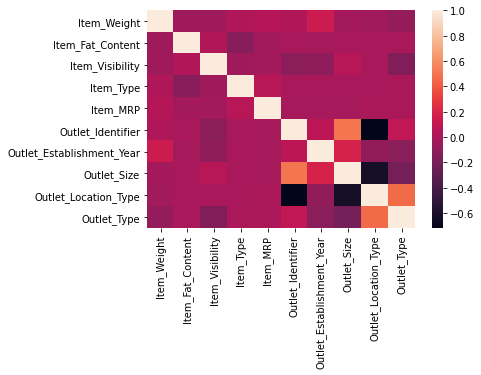

In [97]:
sns.heatmap(df_cor)

outlet_Type is highly correlate with Outlet_Location_Type and least relate with Outlet_Size.
Outlet_Size is high correlate with Outlet_Identifier and least relate with Outlet_Location_Type.

<AxesSubplot:>

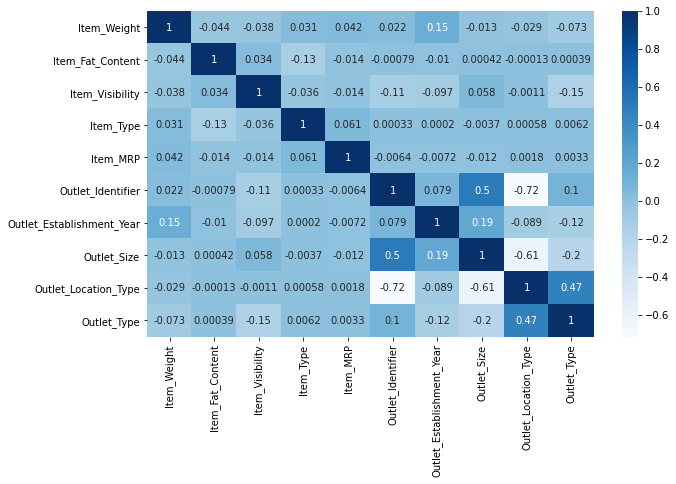

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Item_Outlet_Sales column is highly correlate with Item_MRP and Outlet_Type. Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.

<AxesSubplot:>

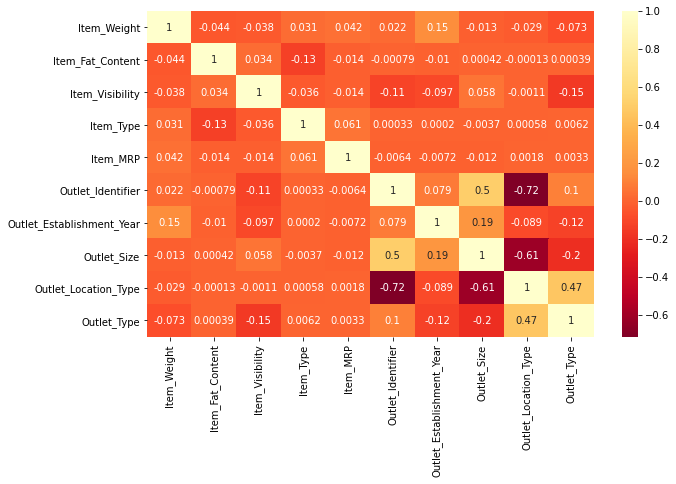

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

Item_Outlet_Sales column is highly correlate with Item_MRP and Outlet_Type. Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

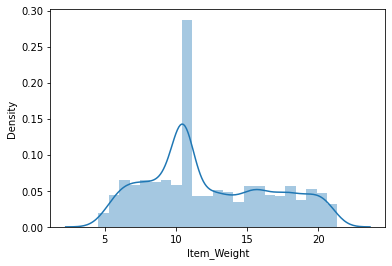

In [100]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

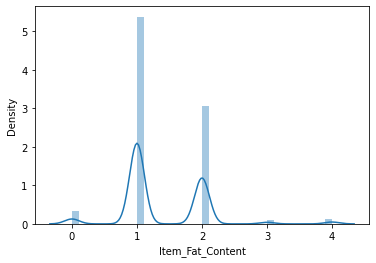

In [101]:
sns.distplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

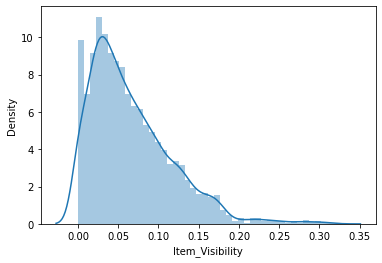

In [102]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

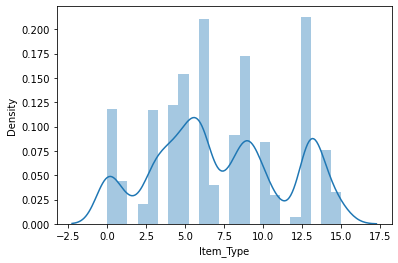

In [103]:
sns.distplot(df['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

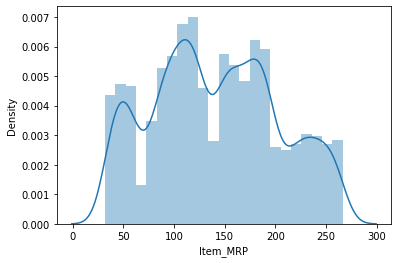

In [104]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

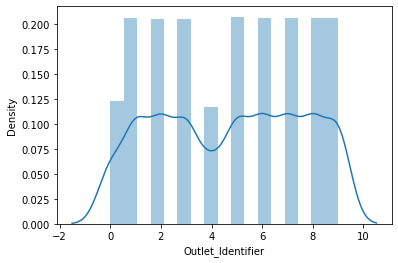

In [105]:
sns.distplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

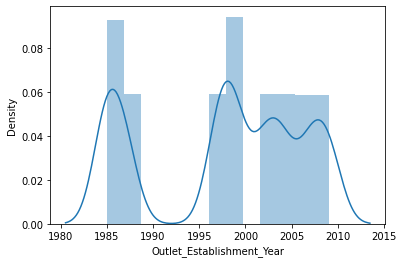

In [106]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

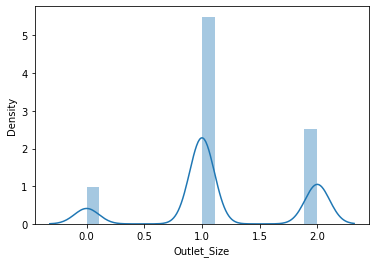

In [107]:
sns.distplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

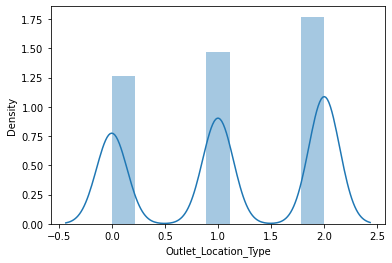

In [109]:
sns.distplot(df['Outlet_Location_Type'])

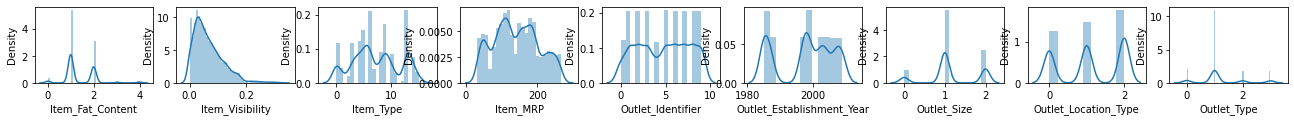

In [110]:
collist=df.columns.values
ncol=10
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

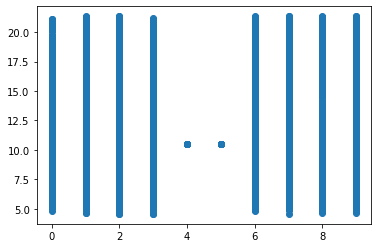

In [111]:
plt.scatter(df['Outlet_Identifier'],df['Item_Weight'])

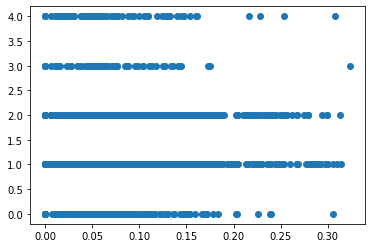

In [112]:
plt.scatter(df['Item_Visibility'],df['Item_Fat_Content'])

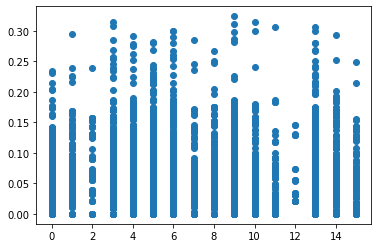

In [113]:
plt.scatter(df['Item_Type'],df['Item_Visibility'])

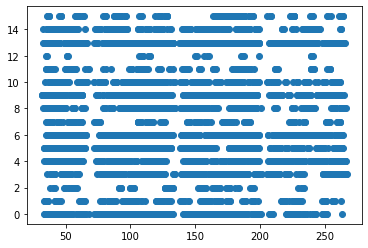

In [114]:
plt.scatter(df['Item_MRP'],df['Item_Type'])

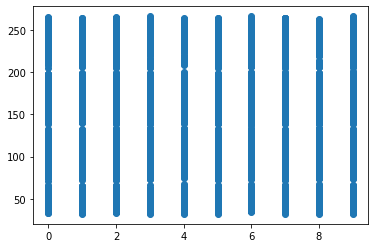

In [41]:
plt.scatter(df['Outlet_Identifier'],df['Item_MRP'])

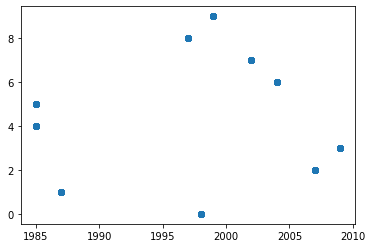

In [115]:
plt.scatter(df['Outlet_Establishment_Year'],df['Outlet_Identifier'])

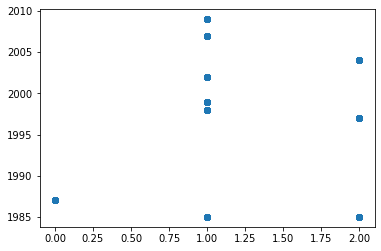

In [116]:
plt.scatter(df['Outlet_Size'],df['Outlet_Establishment_Year'])

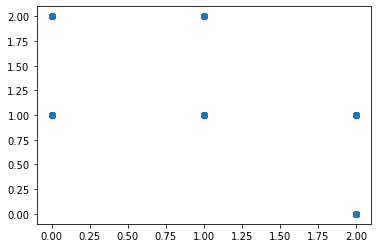

In [117]:
plt.scatter(df['Outlet_Location_Type'],df['Outlet_Size'])

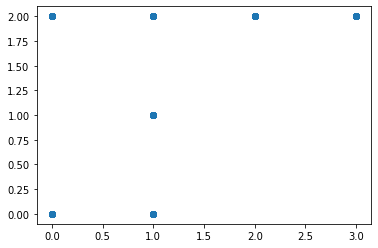

In [118]:
plt.scatter(df['Outlet_Type'],df['Outlet_Location_Type'])

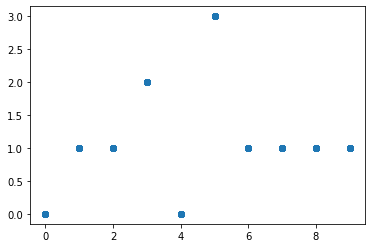

In [119]:
plt.scatter(df['Outlet_Identifier'],df['Outlet_Type'])

In [120]:
df['Outlet_Type']

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int32

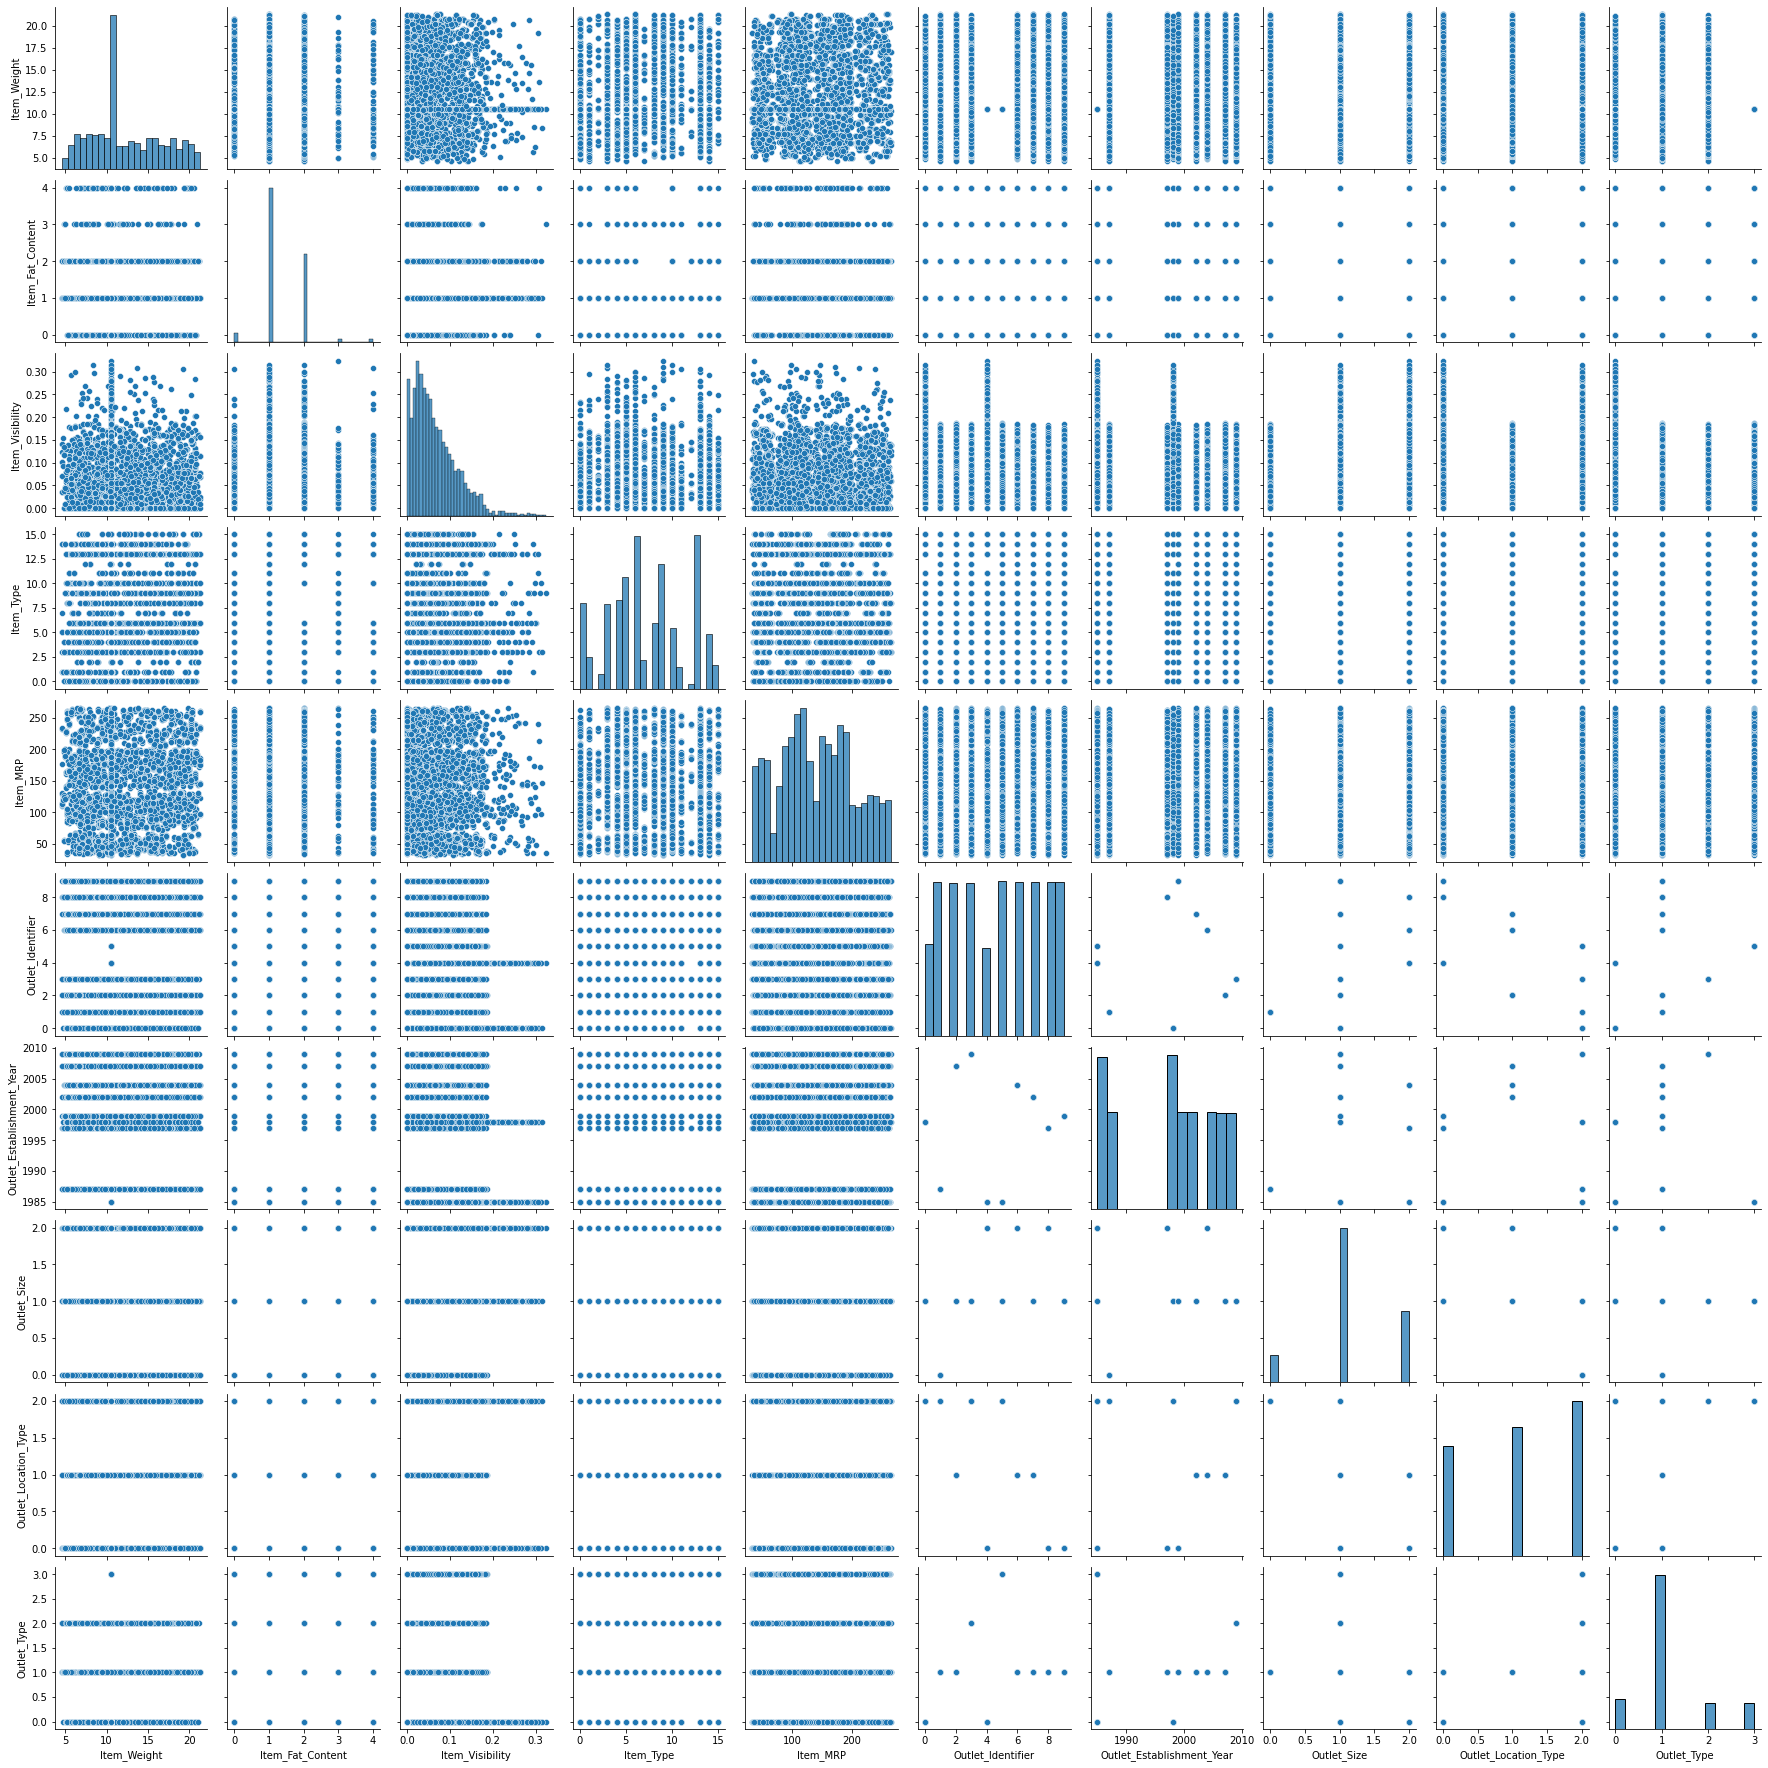

In [121]:
sns.pairplot(df)

# Removing skewness

In [123]:
df.skew()

Item_Weight                  0.374935
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

Skewness is present in Item_Fat_Content,Item_Visibility and Outlet_Type.

In [124]:
df['Item_Fat_Content']=np.log1p(df['Item_Fat_Content'])

In [125]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])

In [126]:
df['Outlet_Type']=np.log1p(df['Outlet_Type'])

In [127]:
df.skew()

Item_Weight                  0.374935
Item_Fat_Content            -0.329520
Item_Visibility              1.075093
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                 -0.235685
dtype: float64

skewness is removed from the columns.

Now we will check outliers by using BoxPlot.

<AxesSubplot:>

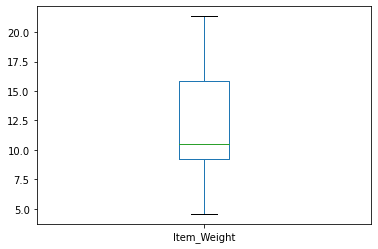

In [128]:
df['Item_Weight'].plot.box()

No outliers are present.

<AxesSubplot:>

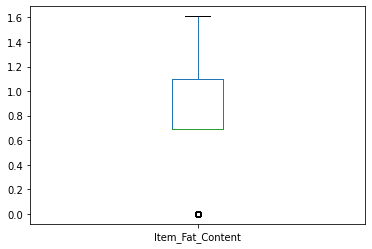

In [129]:
df['Item_Fat_Content'].plot.box()

outliers are present.

<AxesSubplot:>

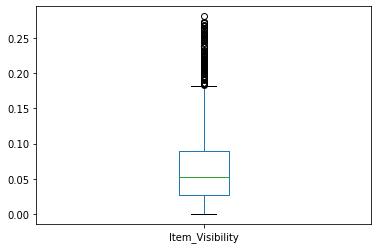

In [130]:
df['Item_Visibility'].plot.box()

outliers are present.

<AxesSubplot:>

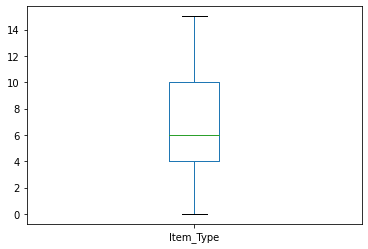

In [131]:
df['Item_Type'].plot.box()

No outliers are present.

<AxesSubplot:>

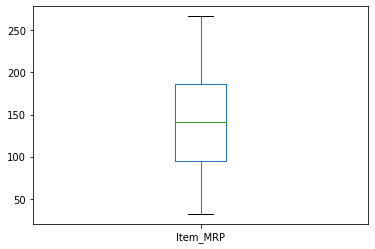

In [132]:
df['Item_MRP'].plot.box()

No outliers are present.

<AxesSubplot:>

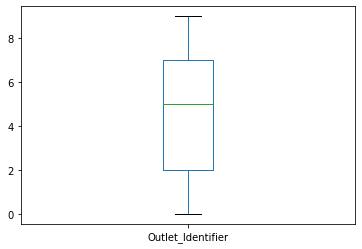

In [133]:
df['Outlet_Identifier'].plot.box()

No outliers are present.

<AxesSubplot:>

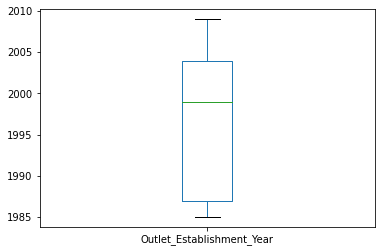

In [134]:
df['Outlet_Establishment_Year'].plot.box()

No outliers are present.

<AxesSubplot:>

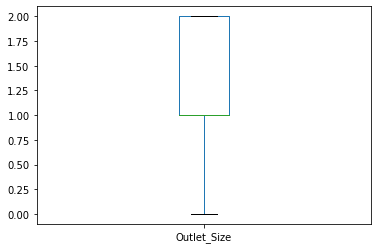

In [135]:
df['Outlet_Size'].plot.box()

No outliers are present.

<AxesSubplot:>

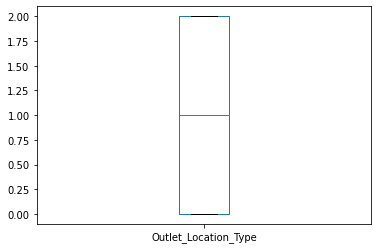

In [136]:
df['Outlet_Location_Type'].plot.box()

No outliers are present.

<AxesSubplot:>

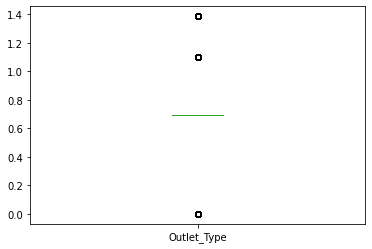

In [137]:
df['Outlet_Type'].plot.box()

 outliers are present.

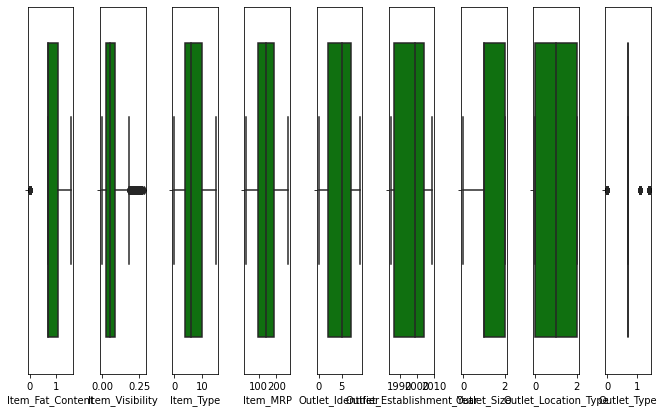

In [138]:
collist=df.columns.values
ncol=25
nrows=22
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Item_Fat_Content,Item_Visibility and Outlet_Type columns has outliers present.

In [65]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Removing Outliers

In [139]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  14,   22,   29,   41,   46,   57,   76,   78,   79,   86,   89,
        137,  138,  138,  171,  211,  214,  255,  303,  319,  331,  333,
        350,  363,  372,  385,  419,  466,  474,  519,  522,  543,  547,
        551,  586,  604,  637,  679,  700,  714,  715,  744,  775,  781,
        788,  793,  835,  852,  858,  860,  928,  950,  955,  976,  998,
       1046, 1068, 1119, 1159, 1185, 1191, 1194, 1196, 1246, 1256, 1270,
       1273, 1279, 1287, 1291, 1294, 1300, 1343, 1397, 1406, 1411, 1449,
       1458, 1469, 1507, 1517, 1532, 1597, 1608, 1616, 1710, 1740, 1750,
       1812, 1819, 1823, 1857, 1870, 1871, 1901, 1915, 1916, 1919, 1934,
       2019, 2130, 2160, 2179, 2199, 2211, 2220, 2230, 2230, 2274, 2285,
       2292, 2303, 2330, 2361, 2365, 2380, 2405, 2421, 2504, 2516, 2530,
       2531, 2605, 2609, 2625, 2628, 2648, 2666, 2677, 2683, 2733, 2779,
       2783, 2799, 2820, 2827, 2836, 2843, 2864, 2910, 2913, 2957, 2970,
       2981, 2986, 3002, 3015, 3020, 3037, 3091, 3

In [140]:
z[14][1]

3.0667186731586233

In [141]:
 z[22][1]

3.0667186731586233

In [142]:
df_new=df[(z<3).all(axis=1)]

In [143]:
df_new.shape

(5410, 10)

In [144]:
df.shape

(5681, 10)

5681-5410=271 outliers are removed from dataset.

# Test The model

In [145]:
import joblib
file=joblib.load('bigdata.obj')

In [146]:


predicted=file.predict("bigdatamarttest.csv")

ValueError: Expected 2D array, got scalar array instead:
array=bigdatamarttest.csv.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [147]:
predicted.to_csv('Results.csv')

NameError: name 'predicted' is not defined